## DVA256 - Data Management and Datafication

### Exercise 2

The exercise 2 covers the topics of text data processing. It also evaluates the students' understanding of the methods to convert texts into useful information applicable to advanced data analytics methods.


#### Exercise Narration

Implementation steps needed for understanding, preprocessing, visualising text data and extracting information from the data will be performed in this exercise. In the subsequent tasks below, five different text datasets will be utilised -
> sample_data_1.txt

> sample_data_2_text_1.txt

> sample_data_2_text_2.txt

> sample_data_2_text_3.txt

> winemag_data_130k.csv


Perform the following tasks by filling the cells below with appropriate python code. Please note that use of library modules are acceptable.

### Solution

Necessary Modules

In [1]:
# necessary models are loaded below to perform the given tasks on text processing...

import re
import collections
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

from wordcloud import WordCloud

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
%matplotlib inline


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /Users/rickard/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rickard/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rickard/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#### Task 1: Read and understand text data.

Dataset to be considered: __`sample_data_1.txt`__

##### (a) Read the supplied text data from directory.

In [2]:
def read_text_file(path_to_file):
    ###
    #   description:  
    #       this function reads the text stored in the file at the given path.
    #  
    #   input parameters: 
    #       path_to_file (string): the path to the text file.
    #
    #   output parameters:
    #       text_data (string): the text contained in the text file at the given path.
    ###

    text_data = None
    ###
    #  INSERT YOUR CODE to read the text data stored at the defined path.
    ###

    with open(path_to_file) as f:
        text_data = f.read()
    #print(text_data)


    return text_data

    pass

In [3]:
# reading the text data from directory...
path_to_text_file = 'text_datasets/sample_data_1.txt'
text_data = read_text_file(path_to_text_file)

# examining the first 100 characters of the loaded text data... 
print(text_data[:100])

An Integrated Modular Design Methodology for Life-Cycle Engineering 
Product modularization for life


##### (b) Extract different features from the loaded data.

In [4]:
def print_data_summary(text_data):
    ###
    #   description:  
    #       this function prints the summary of different features from the input text data -
    #       num_words:      Number of words 
    #       num_chars:      Number of characters
    #       avg_word_len:   Average word length
    #       num_stop_words: Number of stop-words
    #       num_sp_chars:   Number of special characters
    #       num_numeric:    Number of numerics
    #       num_uc_words:   Number of uppercase words
    #  
    #   input parameters: 
    #       text_data (string): the text data to be summarised in terms of different features.
    ###

    # initializing the variables to be computed.
    num_words = num_chars = avg_word_len = num_stop_words = num_sp_chars = num_numeric = num_uc_words = "To be computed."
    ###
    #   INSERT YOUR CODE to compute the values for the defined variables.
    ###
    #firstStep = WordNetLemmatizer().lemmatize(text_data)
    secondStep = WordPunctTokenizer().tokenize(text_data)

    clean_token = []
    for token in secondStep:
        token = token.lower()
        new_token = re.sub(r'^a-zA-Z]+', '', token)
        if new_token != "":# and len(new_token) >= 2:
            vowels = len([v for v in new_token if v in "aeiou"])
            if vowels != 0:
                clean_token.append(new_token)
    num_words = len(clean_token)
    
    looongstringofwords = ""
    for token in clean_token:
        looongstringofwords += token
    num_chars = len(looongstringofwords)
    avg_word_len = num_chars / num_words if num_words != 0 else 0

    stop_words = stopwords.words('english')
    num_stop_words = len([word for word in clean_token if word.lower() in stop_words])
    num_sp_chars = len(re.findall(r'[^a-zA-Z0-9\s]', text_data))
    num_numeric = len(re.findall(r'\d', text_data))
    num_uc_words = len(re.findall(r'\b[A-Z]+\b', text_data))

    #smallWords = []
    #for token in clean_token:
    #    if token in stop_words:
    #        smallWords.append(token)
    #num_stop_words = len(smallWords)
    
    #WordNetLemmatizer().lemmatize()
    #secondStep = re.sub(r'^a-zA-Z]+', '', text_data)
    #num_words = secondStep

    print('Number of words: {}'.format(num_words))
    print('Number of characters: {}'.format(num_chars))
    print('Average length of words: {:.1f}'.format(avg_word_len))
    print('Number of stop-words: {}'.format(num_stop_words))
    print('Number of special characters: {}'.format(num_sp_chars))
    print('Number of numeric characters: {}'.format(num_numeric))
    print('Number of uppercase words: {}'.format(num_uc_words))

    pass

In [5]:
# examining the summary of the loaded text data...
dummytext = """ sjAoakl 00928%&/()=?!&#  anders och rickard medans roligt???? """

print_data_summary(text_data)

Number of words: 505
Number of characters: 3322
Average length of words: 6.6
Number of stop-words: 107
Number of special characters: 56
Number of numeric characters: 4
Number of uppercase words: 18


#### Task 2: Pre-processing of text data

Dataset to be considered: __`sample_data_1.txt`__

The variable `text_data` contains the text from the given file.

##### (a) Create a list of single words/tokens.

In [28]:
def get_single_words(text_data):
    ###
    #   description:  
    #       this function extracts single words from the input text.
    #  
    #   input parameters: 
    #       text_data (string): the text data from which single words are to be extracted.
    #
    #   output parameters:
    #       words (list): the list of words from the input text.
    ###

    words = []
    ###
    #   INSERT YOUR CODE to extract the single words from the input text.
    ###
    
    words = WordPunctTokenizer().tokenize(text_data)


    return words
    
    pass

In [29]:
# extracting the words from the input text and storing in list...
all_words = get_single_words(text_data)

# examining the first ten words...
print(all_words[:10])

['An', 'Integrated', 'Modular', 'Design', 'Methodology', 'for', 'Life', '-', 'Cycle', 'Engineering']


##### (b) Remove the symbols and numbers from the words/tokens.

In [30]:
def get_clean_words(words):
    ###
    #   description:  
    #       this function removes the words with symbols and numeric characters from the input list of words.
    #  
    #   input parameters: 
    #       words (list): a list of words including symbols and numeric characters.
    #
    #   output parameters:
    #       clean_words (list): a list of clean words in lower case.
    ###

    clean_words = []
    ###
    #   INSERT YOUR CODE to extract the single words from the input text.
    ###

    #secondStep = WordPunctTokenizer().tokenize(words)
    
    for token in words:
            token = token.lower()
            new_token = re.sub(r'^a-zA-Z]+', '', token)
            if new_token != "":# and len(new_token) >= 2:
                vowels = len([v for v in new_token if v in "aeiou"])
                if vowels != 0:
                    clean_words.append(new_token)
    return clean_words
    
    pass    

In [31]:
# removing the words with symbols and numbers from the list of all extracted words...
clean_words = get_clean_words(all_words)

# examining the first ten clean words...
print(clean_words[:10])

['an', 'integrated', 'modular', 'design', 'methodology', 'for', 'life', 'cycle', 'engineering', 'product']


##### (c) Remove the stop-words from the clean words/tokens.

In [32]:
def remove_stop_words(words):
    ###
    #   description:  
    #       this function removes the stop words from the input list of words.
    #  
    #   input parameters: 
    #       words (list): a list of words.
    #
    #   output parameters:
    #       words_with_no_sw (list): a list of words after removing the stop words.
    ###

    words_with_no_sw = []
    ###
    #   INSERT YOUR CODE to extract the single words from the input text.
    ###
    stop_words = stopwords.words('english')

    words_with_no_sw =[x for x in clean_words if x not in stop_words]


    return words_with_no_sw
    
    pass  

In [34]:
# removing the stop words from the list of clean words...
tokens = remove_stop_words(clean_words)

# examining the first ten words/tokens...
print(tokens[:10])

['integrated', 'modular', 'design', 'methodology', 'life', 'cycle', 'engineering', 'product', 'modularization', 'life']


##### (d) Tag the tokens with their part-of-speech (POS) positions.

In [35]:
def pos_tag_tokens(tokens):
    ###
    #   description:  
    #       this function tags the tokens with their part-of-speech (POS) positions.
    #  
    #   input parameters: 
    #       tokens (list): a list of clean words with no stop words.
    #
    #   output parameters:
    #       pos_tag_set (DataFrame): a dataframe with two columns for the word and its pos tag.
    ###

    pos_tag_set = pd.DataFrame(columns = ['token', 'tag'])
    ###
    #   INSERT YOUR CODE to extract the single words from the input text.
    ###

    data_tagset = nltk.pos_tag(tokens)
    pos_tag_set = pd.DataFrame(data_tagset, columns = ['Word', 'Tag'])

    return pos_tag_set
    
    pass 

In [36]:
# pos tagging the list of tokens...
pos_tag_df = pos_tag_tokens(tokens)

# examining the first ten words/tokens...
display(pos_tag_df.head(10))
#print(type(pos_tag_df))

,Word,Tag
0,integrated,JJ
1,modular,JJ
2,design,NN
3,methodology,NN
4,life,NN
5,cycle,NN
6,engineering,NN
7,product,NN
8,modularization,NN
9,life,NN


##### (e) Lemmatize the POS tagged tokens.

In [120]:
def lemmatize(pos_tag_df):
    ###
    #   description:  
    #       this function lemmatize the words/tokens from the input dataframe on the basis of its pos tag.
    #  
    #   input parameters: 
    #       pos_tag_df (DataFrame): a dataframe with two columns for the word/token and its pos tag.
    #
    #   output parameters:
    #       token_lemma (DataFrame): a dataframe with three columns for the word/token, its pos tag and lemmatized form.
    ###

    token_lemma = pd.DataFrame(columns = ['token', 'tag', 'lemma'])
    ###
    #   INSERT YOUR CODE to extract the single words from the input text.
    ###
    newtokenlemma = []

    for index, row in pos_tag_df.iterrows():
        token = row['Word']
        tag = row['Tag']
        if tag[0] == 'J':
            wordnet_pos = wn.ADJ
        elif tag[0] == 'V':
            wordnet_pos = wn.VERB
        elif tag[0] == 'N':
            wordnet_pos = wn.NOUN
        elif tag[0] == 'R':
            wordnet_pos = wn.ADV
        else:
            wordnet_pos = wn.NOUN
        lemma = WordNetLemmatizer().lemmatize(token, pos=wordnet_pos)
        newtokenlemma.append({'token': token, 'tag': tag, 'lemma': lemma})
    
    token_lemma = pd.DataFrame(newtokenlemma, columns = ['token', 'tag', 'lemma'])
    
    return token_lemma
    


In [157]:
# converting the pos tagged words to their corresponding root forms...
data_df = lemmatize(pos_tag_df)

# examining the first 5 lemmatized words...
display(data_df.head(10))

,token,tag,lemma
0,integrated,JJ,integrated
1,modular,JJ,modular
2,design,NN,design
3,methodology,NN,methodology
4,life,NN,life
5,cycle,NN,cycle
6,engineering,NN,engineering
7,product,NN,product
8,modularization,NN,modularization
9,life,NN,life


In [170]:
# examining first 5 instances where tokens and lemmas are different [it is to check, whether the tokens are correctly lemmatized or not]...
display(data_df[(data_df['token'] != data_df['lemma'])].head(5))

,token,tag,lemma
21,considerations,NNS,consideration
23,actions,NNS,action
26,interactions,NNS,interaction
28,modeling,VBG,model
30,oriented,VBN,orient


##### (f) Show the list of lemmatized words.

In [189]:
# creating a list of lemmatized words...
lemma_list = []

###
#  INSERT YOUR CODE to create a list of the lemmatized words for display.
###

lemma_list = [str(x) for x in data_df['lemma']]


# examining the first 10 lemmatized words... 
print(lemma_list[:50])

['integrated', 'modular', 'design', 'methodology', 'life', 'cycle', 'engineering', 'product', 'modularization', 'life', 'cycle', 'engineering', 'multi', 'phase', 'approach', 'supply', 'chain', 'design', 'product', 'life', 'cycle', 'consideration', 'adaptive', 'action', 'replace', 'human', 'interaction', 'product', 'model', 'process', 'orient', 'semantic', 'knowledge', 'management', 'product', 'lifecycle', 'management', 'life', 'cycle', 'analysis', 'hydrogen', 'production', 'development', 'implementation', 'product', 'life', 'cycle', 'optimization', 'model', 'knowledge']


#### Task 3: Visualization of text data

Dataset to be considered: __`sample_data_1.txt`__

(a) Generate a word cloud

The list `lemma_list` contains the lemmatized words from the given file.

(a) Enhance the word cloud by setting different values for the parameters, e.g., font size, maximum number of words, background color, etc.

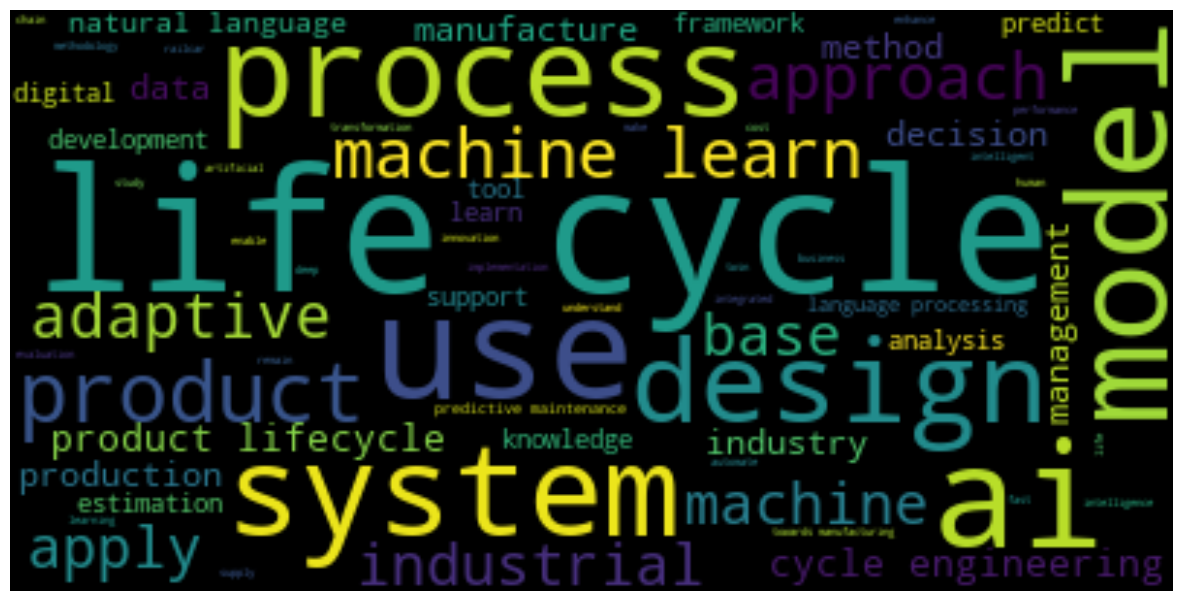

In [184]:
# creating a word cloud from the list of lemmatized words...

###
#   INSERT YOUR CODE to generate the wordcloud from lemmatized words for display.
#   Hint: the word cloud generator method only accepts a string as input.
###

# showing the wordcloud in notebook... 
AllTheWords = ','.join(lemma_list)
wordcloud = WordCloud().generate(AllTheWords)


plt.figure(figsize=(15,15))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

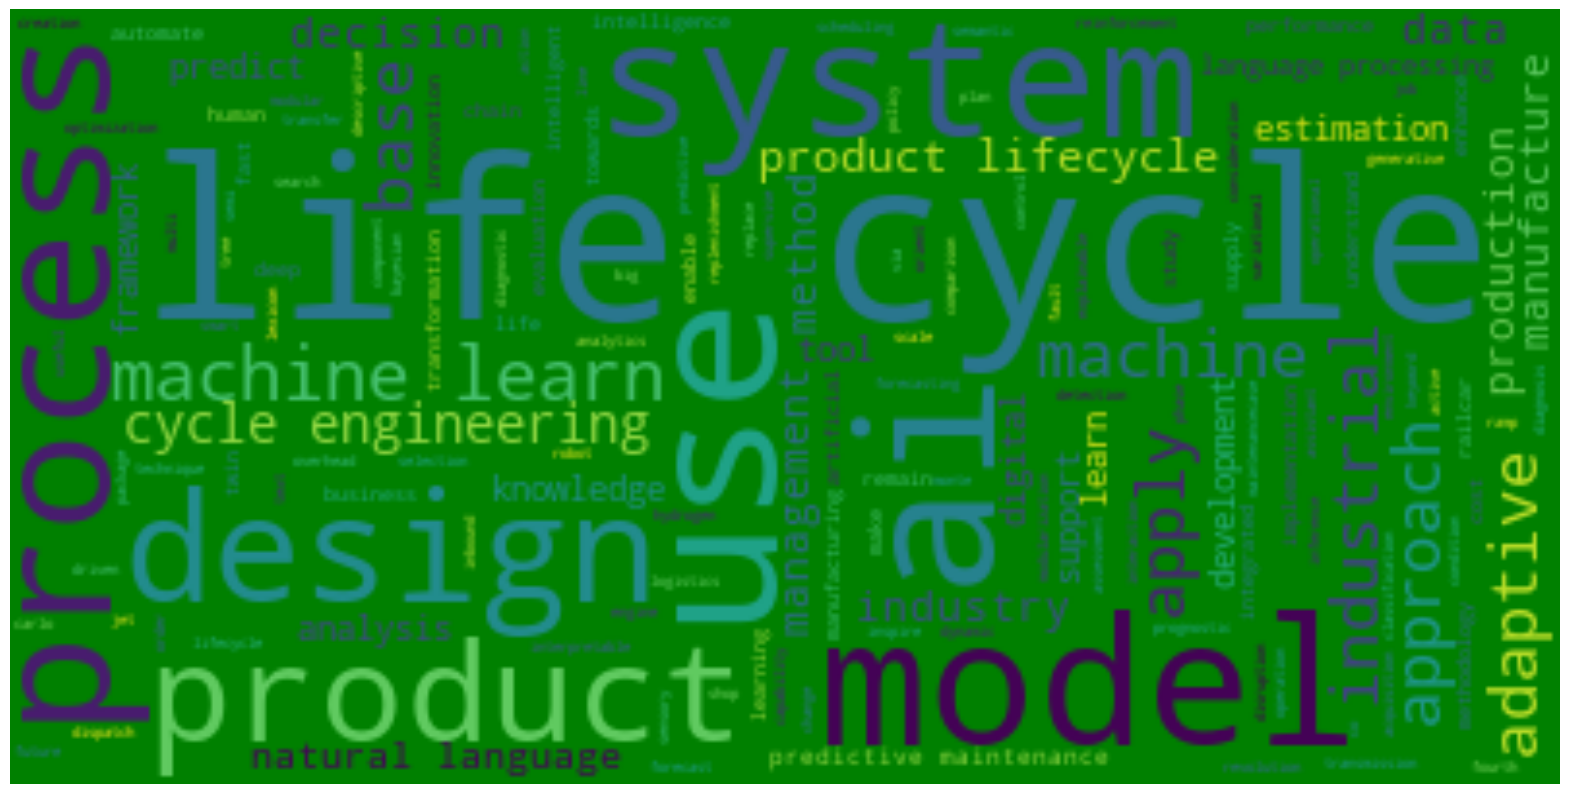

In [202]:
# modifying the word cloud by changing different parameter values ...

###
#   INSERT YOUR CODE to generate the wordcloud from lemmatized words for display.
###


    
AllTheWords = ','.join(lemma_list)
wordcloud = WordCloud(max_words = 10000, mode="RGBA", prefer_horizontal=0.5, background_color="green").generate(AllTheWords)


    



# showing the wordcloud in notebook... 
plt.figure(figsize=(20,20))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Task 4: Visualization of text data

Dataset to be considered: __`winemag_data_130k.csv`__

(a) Load and examine the data.

In [204]:
# loading and examining the text data from the given dataset...
path_to_text_file = 'text_datasets/winemag_data_130k.csv'
wine_data = None

###
#   INSERT YOUR CODE to read the given .CSV file and load into the dataframe wine_data.
wine_data = pd.read_csv(path_to_text_file)
#

# examining the first 5 instances from the imported data...
display(wine_data.head(5))

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


(b) Compute summary statistics.

In [ ]:
# computing summary statistics for different countries from the dataframe wine_data...
country_summary = None

###
#   INSERT YOUR CODE to compute the summary statistics.
#   Hint: use groupby() and describe() functions.
#

# showing the summary statistics of alphabetically top ten countries
display(country_summary[:10])

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   
Brazil                    52.0  84.673077  2.340782  80.0  83.00  85.0  86.00   
Bulgaria                 141.0  87.936170  2.077817  80.0  87.00  89.0  89.00   
Canada                   257.0  89.369650  2.384752  82.0  88.00  90.0  91.00   
Chile                   4472.0  86.493515  2.692959  80.0  85.00  86.0  88.00   
China                      1.0  89.000000       NaN  89.0  89.00  89.0  89.00   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   
Brazil                   89.0    47.0  23.765957  11.053649  10.0  15.00   
Bulgaria                 91.0   141.0  14.645390   9.508744   8.0  10.00   
Canada                   94.0   254.0  35.712598  19.658148  12.0  21.00   
Chile                    95.0  4416.0  20.786458  21.929371   5.0  12.00   
China                    89.0     1.0  18.000000        NaN  18.0  18.00   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0  
Brazil                  20.0  29.00    60.0  
Bulgaria                13.0  16.00   100.0  
Canada                  30.0  40.75   120.0  
Chile                   15.0  20.00   400.0  
China                   18.0  18.00    18.0

(c) Plot the number of different wines in descending order by each country.

Text(0.5, 1.0, 'Number of Different Wines Produced by Different Countries')

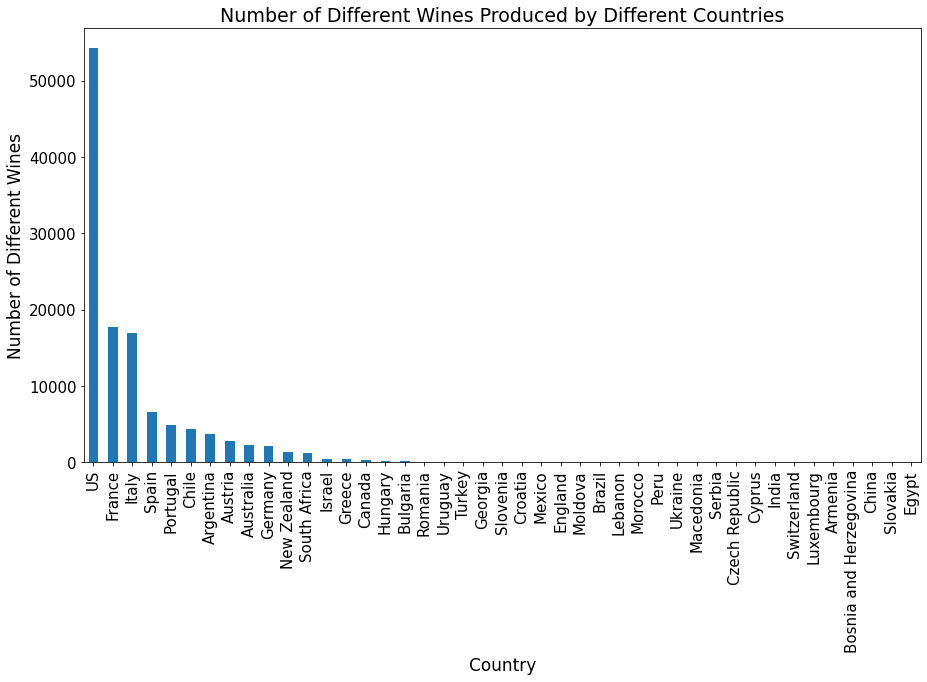

In [ ]:
# plotting the number of different wines from different countries...
###
# INSERT YOUE CODE to generate a plot.
###

#### Task 5: Advanced text analysis methods

Three datasets to be considered: __`sample_data_2_text_1.txt`__, __`sample_data_2_text_2.txt`__ and __`sample_data_2_text_3.txt`__

In [ ]:
# reading the three different text datasets using 'read_text_file' methods from Task 1(a)...
text_data_1 = read_text_file('text_datasets/sample_data_2_text_1.txt')
text_data_2 = read_text_file('text_datasets/sample_data_2_text_2.txt')
text_data_3 = read_text_file('text_datasets/sample_data_2_text_3.txt')

(a) Generate vector representation using Bag-of-Words model.

In [ ]:
def compute_text_vectors(list_of_text_string):
    ###
    #   description:  
    #       this function generates vector representation for each of the text strings.
    #  
    #   input parameters: 
    #       list_of_text_string (list): a list with n text strings.
    #
    #   output parameters:
    #       text_vectors (DataFrame): a dataframe containing n rows; i-th row contains the vector representation of the i-th text string from the input list.
    ###

    text_vectors = pd.DataFrame()
    ###
    # INSERT YOUE CODE to generate the vector representations. 
    ###
    return text_vectors

    pass

In [ ]:
# computing the vector representations for the three datasets
list_of_text_data = [text_data_1, text_data_2, text_data_3]
vectors = compute_text_vectors(list_of_text_data)

# displaying the vector representation of the three datasets
display(vectors)

,abbreviated,ability,absolute,accidental,acquisition,adaptation,additional,advanced,advent,africa,...,weapons,widespread,within,world,worldwide,would,wwi,wwii,wwiii,years
0,1,0,0,0,0,0,1,0,0,1,...,0,0,1,2,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,4,0,0,0,1,0,0
2,1,1,1,1,1,1,0,1,1,0,...,2,2,0,12,1,2,0,0,1,1


(b) Find similarity among different texts using any method.

In [ ]:
def compute_similarity(vectors):
    ###
    #   description:  
    #       this function computes a matrix containing pairwise similarity scores.
    #  
    #   input parameters: 
    #       vectors (DataFrame): a dataframe containing n rows; ith row contains the vector representation of the ith text string from the input list.
    #
    #   output parameters:
    #       similarity_matrix (n X n array): a matrix containing the similarity scores; 
    #                                           value at the cell on i-th row and j-th column contains the similarity between i-th and j-th vectors.
    ###

    similarity_matrix = [[]]
    ###
    # INSERT YOUR CODE to compute the pairwise similarity matrix with your preferred method.
    #
    return similarity_matrix 

    pass

In [ ]:
# computing the matrix containing pairwise similarity among the vector representations...
similarity_matrix = compute_similarity(vectors)

# displaying the pairwise similariy scores...
print('Pairwise similarity -')
print('text_1 and text_2: {:.2f}'.format(similarity_matrix[0][1]))
print('text_2 and text_3: {:.2f}'.format(similarity_matrix[1][2]))
print('text_3 and text_1: {:.2f}'.format(similarity_matrix[2][0]))

Pairwise similarity -
text_1 and text_2: 0.35
text_2 and text_3: 0.58
text_3 and text_1: 0.28


#### The assignment is completed, great work!!!